### Exercises

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

 - Has the network latency gone up since we switched internet service providers?

- $H_{0}$ = Network latency has no effect on switching internet service providers
- $H_{a}$ = Network latency has gone up since switching internet service providers
- true_pos = alpha > p value, we establish that internet service does impact latency
- true_neg = alpha < p, we establish that internet service has no impact on latency
- type1_error = we reject that internet service has no impact on latency but the truth is there is no impact
- type2_error = we don't reject that internet service has no impact on latency but there is significant impact why?

- Is the website redesign any good?

- $H_{0}$ = The webside design has no impact on total revenue
- $H_{a}$ = The website design has a correlation on total revenue
- true_pos = alpha > p value, we establish website design does affect total revenue
- true_neg = alpha < p, we establish that website design has no impact on revenue
- type1_error = we reject that website design has no impact on revenue but the truth is there is no impact
- type2_error = we don't reject that website design has no impact on revenue but there is significant impact, why?

- Is our television ad driving more sales?

- $H_{0}$ = Our television ad is not driving sales
- $H_{a}$ = Our television ad is driving more sales
- true_pos = reject null, the ad is driving more sales
- true_neg = accept null, and there is no significance of our ad on sales
- type1_error = we reject null, and say there is a significance of ad on sales and there is actually no significance
- type2_error = we accept that television ad is not driving sales, but actually there is significant impact.

Using the Zillow database:    

- Does square feet affect home value?

- $H_{0}$ = calculatedfinishedsquarefeet has no impact on taxvaluedollarcnt
- $H_{a}$ = calculatedfinishedsquarefeet has a significant impact on taxvaluedollarcnt
- true_pos = reject $H_{0}$, calculatedfinishedsquarefeet has a significant impact on taxvaluedollarcnt
- true_neg = accept $H_{0}$, calculatedfinishedsquarefeet has no impact on taxvaluedollarcnt
- type1error = we reject $H_{0}$, we say calculatedfinishedsquarefeet has a significant impact on taxvaluedollarcnt, and the reality is calculatedfinishedsquarefeet has no impact on taxvaluedollarcnt
- type2error = we accept calculatedfinishedsquarefeet has no impact on taxvaluedollarcnt, but actually calculatedfinishedsquarefeet has a significant impact on taxvaluedollarcnt

- Do newer homes generally have a larger square footage?

- $H_{0}$ = yearbuit has no impact on taxvaluedollarcnt
- $H_{a}$ = yearbuilt has a significant impact on taxvaluedollarcnt
- true_pos = we reject $H_{0}$, yearbuilt has a significant impact on taxvaluedollarcnt
- true_neg = we accept $H_{0}$, yearbuilt has no effect on taxvaluedollarcnt
- type1_error = we reject $H_{0}$, we say yearbuilt has a significant impact on taxvaluedollarcnt, but in reality it doesn't
- type2_error = we don't reject $H_{0}$, we say yearbuit has no impact on taxvaluedollarcnt, but actually it does.

In [18]:
from math import sqrt
from scipy import stats
from pydataset import data


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import viz

### Hypothesis Testing Exercises

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [5]:
# Two different samples, two tailed test
alpha = 0.05

In [8]:
mean1=90
std_dev1=15
nobs1=40
var1=15**(1/2)

mean2=100
std_dev2=20
nobs2=50
var2=20**(1/2)


t, p = stats.ttest_ind_from_stats(mean1, std_dev1, nobs1,
                                 mean2, std_dev2, nobs2, equal_var=False)
t, p, alpha

(-2.7091418459143854, 0.00811206270346016, 0.05)

In [129]:
p < alpha

True

In [130]:
if p < alpha: 
    print("Reject the null hypothesis, they are the same")
    print("We move forward with the alternative hypothesis")
else:
    print("We fail to reject the null hypothesis")

Reject the null hypothesis, they are the same
We move forward with the alternative hypothesis


### Load the mpg dataset and use it to answer the following questions:

In [19]:
mpg = data("mpg")
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
78,ford,explorer 4wd,4.0,1999,6,auto(l5),4,14,17,r,suv
201,toyota,toyota tacoma 4wd,2.7,1999,4,manual(m5),4,15,20,r,pickup
194,toyota,corolla,1.8,1999,4,auto(l3),f,24,30,r,compact
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,13,17,r,suv
145,nissan,altima,2.5,2008,4,manual(m6),f,23,32,r,midsize


In [21]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
mpg['average_mileage'] = (mpg.hwy + mpg.cty) / 2
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
116,hyundai,tiburon,2.0,1999,4,auto(l4),f,19,26,r,subcompact,22.5
141,mercury,mountaineer 4wd,5.0,1999,8,auto(l4),4,13,17,r,suv,15.0
199,toyota,land cruiser wagon 4wd,4.7,1999,8,auto(l4),4,11,15,r,suv,13.0
182,toyota,camry,2.4,2008,4,manual(m5),f,21,31,r,midsize,26.0
224,volkswagen,new beetle,2.0,1999,4,manual(m5),f,21,29,r,subcompact,25.0


In [24]:
# set up my variables
fuel99 = mpg[mpg.year==1999].average_mileage
fuel08 = mpg[mpg.year==2008].average_mileage

<AxesSubplot:>

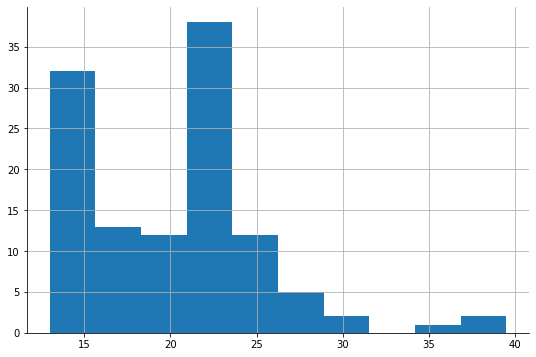

In [25]:
fuel99.hist()

<AxesSubplot:>

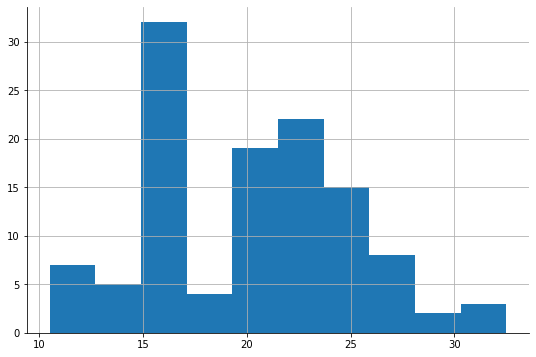

In [26]:
fuel08.hist()

### set hypothesis
- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?\

$H_{0}$: There is no difference in fuel-efficiency in cars from 2008 and 1999.\
$H_{a}$: There is a difference in fuel-efficiency in cars from 2008 and 1999.

In [29]:
fuel99.var(), fuel08.var()

(27.122605363984682, 24.097480106100797)

In [33]:
t, p = stats.ttest_ind(fuel08, fuel99, equal_var=True)

t, p, alpha

(-0.21960177245940962, 0.8263744040323578, 0.05)

In [131]:
if p < alpha: 
    print("Reject the null hypothesis, they are the same")
    print("We move forward with the alternative hypothesis")
else:
    print("We fail to reject the null hypothesis")

Reject the null hypothesis, they are the same
We move forward with the alternative hypothesis


### - Are compact cars more fuel-efficient than the average car?

In [42]:
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
50,dodge,dakota pickup 4wd,3.7,2008,6,auto(l4),4,14,18,r,pickup,16.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
102,honda,civic,1.6,1999,4,manual(m5),f,25,32,r,subcompact,28.5
13,audi,a4 quattro,2.8,1999,6,manual(m5),4,17,25,p,compact,21.0
162,subaru,forester awd,2.5,2008,4,manual(m5),4,20,27,r,suv,23.5


In [83]:
# set up my variables
compact = mpg[mpg['class'] == 'compact'].average_mileage
all_cars = mpg.average_mileage

<AxesSubplot:>

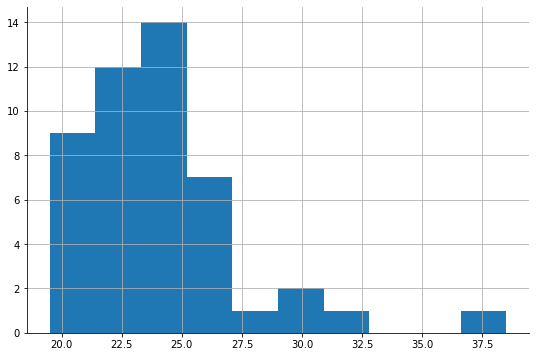

In [72]:
compact.hist()

<AxesSubplot:>

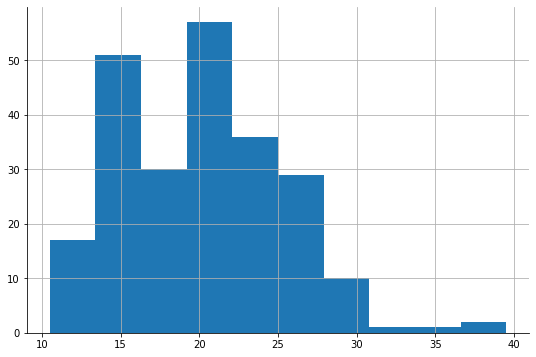

In [84]:
all_cars.hist()

In [75]:
compact.count(), all_cars.count()

(47, 234)

In [77]:
compact.var(), all_cars.var()

(12.442876965772433, 25.50542900113715)

$H_{0}$: Compact cars are not more fuel efficient than the average\
$H_{a}$: Compact cars are more fuel-efficient than the average car

In [94]:
# one sample ttest, 1-tail test
alpha = 0.05
compact = mpg[mpg['class'] == 'compact'].average_mileage
overall_mean = mpg.average_mileage.mean()

t, p = stats.ttest_1samp(compact, overall_mean)
t, p/2, alpha

(7.896888573132535, 2.0992818971585668e-10, 0.05)

In [95]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


### Do manual cars get better gas mileage than automatic cars?

In [99]:
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
22,chevrolet,c1500 suburban 2wd,5.7,1999,8,auto(l4),r,13,17,r,suv,15.0
213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,38.5
210,volkswagen,gti,2.0,2008,4,manual(m6),f,21,29,p,compact,25.0
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact,22.0
165,subaru,forester awd,2.5,2008,4,auto(l4),4,18,23,p,suv,20.5


In [106]:
manual = mpg[mpg['trans'].str.startswith('m')].average_mileage
automatic = mpg[mpg['trans'].str.startswith('a')].average_mileage

<AxesSubplot:>

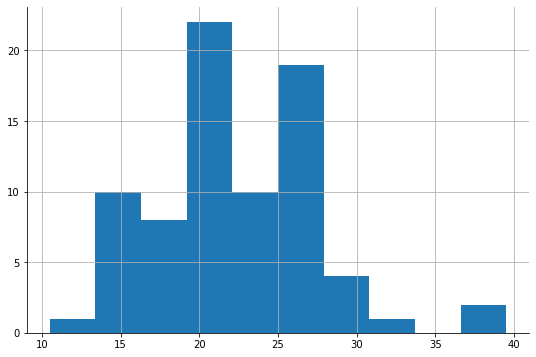

In [107]:
manual.hist()

<AxesSubplot:>

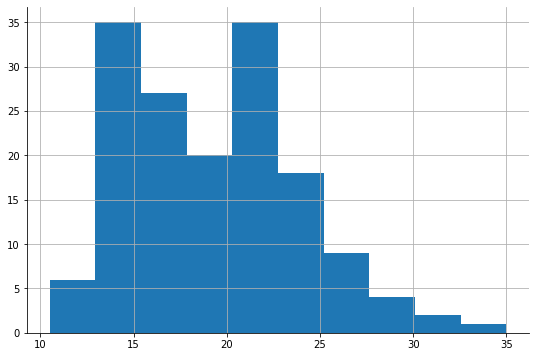

In [110]:
automatic.hist()

In [111]:
manual.count(), automatic.count()

(77, 157)

In [123]:
manual.var(), automatic.var()

(26.635167464114826, 21.942777233382337)

In [124]:
stats.levene(manual, automatic)
# if p < .05 then equal_var=False
# if p > 0.05 then equal_var=True

LeveneResult(statistic=0.20075824847529639, pvalue=0.6545276355131857)

In [125]:
alpha = 0.05

t, p = stats.ttest_ind(manual, automatic, equal_var=True)

t, p/2, alpha

(4.593437735750014, 3.5771872005728416e-06, 0.05)

In [126]:
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)

is p/2 < alpha?  True
is t > 0?  True


In [127]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


In [128]:
t, p = stats.ttest_ind(automatic, manual, equal_var=True)

t, p/2, alpha

(-4.593437735750014, 3.5771872005728416e-06, 0.05)